<a href="https://colab.research.google.com/github/deniseg20/MSRIUP/blob/main/Copy_of_Intro_Dashboards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Publishing Simple Dashboards

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


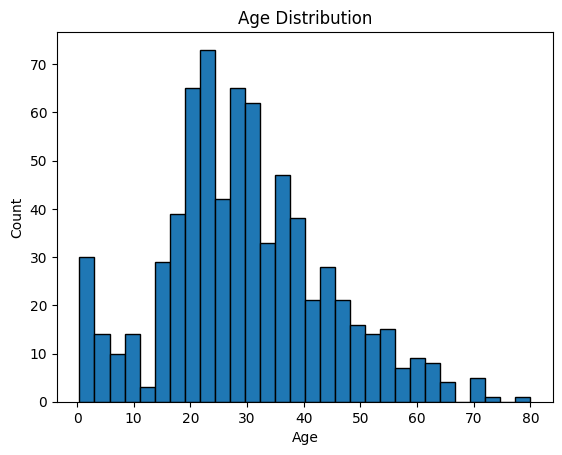

In [3]:
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

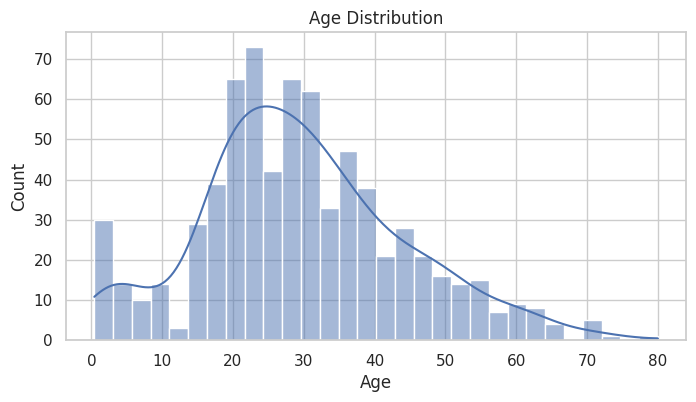

In [4]:
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [9]:
import altair as alt
import pandas as pd

# Load and clean data
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df_clean = df[df["Age"].notna()]

# Histogram bars (true bins, actual count)
bar_chart = alt.Chart(df_clean).mark_bar(
    color='steelblue',
    opacity=0.7
).encode(
    x=alt.X("Age:Q", bin=alt.Bin(maxbins=30), title="Age (years)"),
    y=alt.Y("count():Q", title="Passenger Count")
)

# KDE line (independent density estimate)
KDE_line = alt.Chart(df_clean).transform_density(
    'Age',
    as_=['Age', 'density'],
    bandwidth=5
).mark_line(
    color='firebrick',
    strokeWidth=3
).encode(
    x='Age:Q',
    y=alt.Y('density:Q', axis=alt.Axis(title='Density'))
)

# Layer both charts
chart = (bar_chart + KDE_line).resolve_scale(
    y='independent'  # allow separate scales for count and density
).properties(
    width=600,
    height=400,
    title="Age Distribution of Titanic Passengers (Histogram + KDE)"
).interactive()

chart

chart.interactive().display()
chart.save("altair_age.html")


alt.LayerChart(...)

In [7]:
import altair as alt
alt.Chart(df_clean).mark_bar().encode(
    alt.X("Age:Q", bin=alt.Bin(maxbins=30)),
    y='count()'
).properties(title="Age Distribution")

alt.Chart(...)

In [10]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[df["Age"].notna()]

# Create histogram
fig = px.histogram(df, x="Age", nbins=30)

# Add a proper title and subtitle using layout
fig.update_layout(
    title=dict(
        text="<b>📊 Age Distribution of Titanic Passengers</b><br><sup>Histogram with interactive features</sup>",
        x=0.5,
        xanchor='center'
    ),
    xaxis_title="Age",
    yaxis_title="Number of Passengers",
    margin=dict(t=100),
    annotations=[
        dict(
            text="ℹ️ Hover over bars to explore.<br>Zoom in by dragging. Double-click to reset.",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.5, y=-0.2,
            xanchor="center", yanchor="top",
            font=dict(size=12),
            align="center"
        )
    ]
)

# Save as standalone HTML
fig.write_html("index.html", include_plotlyjs="cdn", full_html=True)

# Download it
from google.colab import files
files.download("index.html")
fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>